In [1]:
"""
Analyze daughter particles for annihilation event
author: Jiancheng Zeng
Date: July 12, 2023
"""

'\nAnalyze daughter particles for annihilation event\nauthor: Jiancheng Zeng\nDate: July 12, 2023\n'

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis
import corner

In [3]:
file_path_1 = '/home/jiancheng/GRAMS/toymodel_work/output/2023/anti_He3_daughters_all_1e6.dat'
label_50cm= '140cm width'

anti_He3_data_3d = toy_model_analysis.read_data_from_toymodel(file_path_1)
anti_He3_Result = toy_model_analysis.Analyze_daughter(anti_He3_data_3d, -1000010020, stop_event=True, in_flight_event=True)


Reading data...

Toy Model data imported
Found 1525 Events!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
[                                                  ] 0.33% 5/1525vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 second!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
vertex #2 first!
[                                                  ] 0.59% 9/1525vert

In [4]:
print(anti_He3_Result.get_value(0, 0))
print("\n")
# anti_He3_Result vector meaning: anti_He3_Result.get_value([event number][0 for general info/1 for daughter detailed info])
print(anti_He3_Result.get_value(2, 1)[0])

[176, 5.3198, 147.4859998765365, 0.0, 7.697882, 266.48761499999995, 0.0]


[1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 189, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 22

[7190, 1312.52, 139.07433095830427, 0.0, 7.73439, 138.26557, -0.58019]


([<matplotlib.axis.XTick at 0x7f4f8ad18400>,
 [Text(0, 0, '-211'),
  Text(1, 0, '11'),
  Text(2, 0, '22'),
  Text(3, 0, '111'),
  Text(4, 0, '211'),
  Text(5, 0, '2112'),
  Text(6, 0, '2212'),
  Text(7, 0, '1000010020'),
  Text(8, 0, '1000010030'),
  Text(9, 0, '1000130260')])

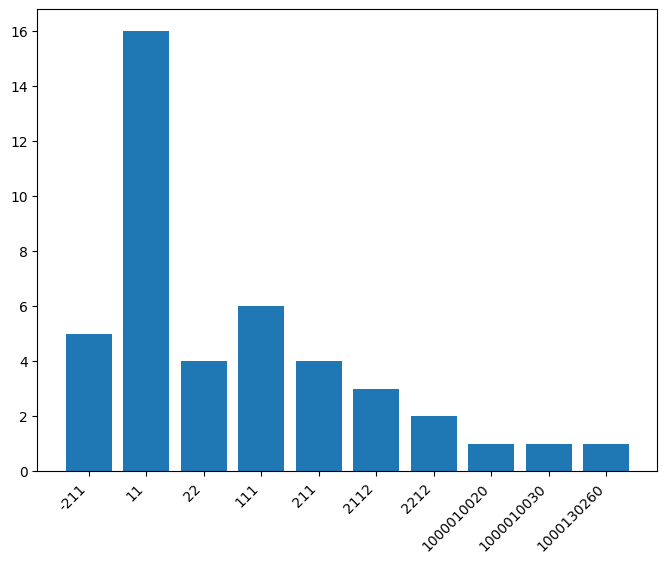

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

print(anti_He3_Result.get_value(10, 0))

# Count the occurrences of each unique element
unique_elements, element_counts = np.unique(anti_He3_Result.get_value(2, 1)[1], return_counts=True)

# Create an evenly spaced range of numbers for the x-axis
x_values = np.arange(len(unique_elements))

# Create the bar plot
plt.bar(x_values, element_counts)

# Set the x-ticks and labels
plt.xticks(x_values, unique_elements, rotation=45, ha='right')

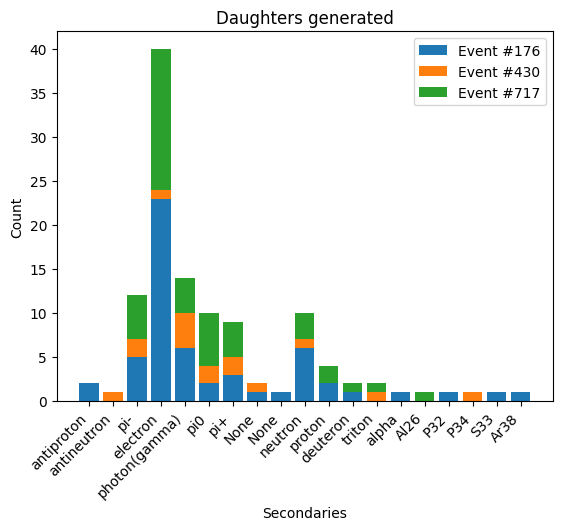

In [6]:
# This is for listing all the daughters

import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_datasets(datasets):
    # Obtain the unique elements from all datasets
    unique_elements = np.unique(np.concatenate([data[1] for data in datasets]))

    # Initialize counts for each dataset
    dataset_counts = []
    for data in datasets:
        counts = np.zeros_like(unique_elements)
        for i, elem in enumerate(unique_elements):
            counts[i] = np.count_nonzero(data[1] == elem)
        dataset_counts.append(counts)

    # Create an evenly spaced range of numbers for the x-axis
    x_values = np.arange(len(unique_elements))

    # Plot the data for each dataset
    for i, counts in enumerate(dataset_counts):
        label = 'Event #' + str(anti_He3_Result.get_value(i, 0)[0])
        if i == 0:
            plt.bar(x_values, counts, label=label)
        else:
            plt.bar(x_values, counts, bottom=np.sum(dataset_counts[:i], axis=0), label=label)

    # Apply the function to the array of particle IDs using np.vectorize()
    x_name = np.vectorize(toy_model_analysis.name_of_particle)(unique_elements)

    # Set the x-ticks and labels
    plt.xticks(x_values, x_name, rotation=45, ha='right')

    # Add labels and title
    plt.xlabel('Secondaries')
    plt.ylabel('Count')
    plt.title('Daughters generated')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


datasets = []
for i in range(3):
    datasets.append([i, anti_He3_Result.get_value(i, 1)[1]])


plot_multiple_datasets(datasets)


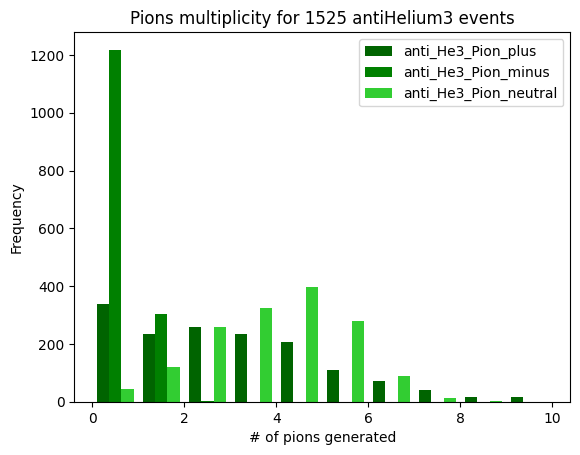

In [7]:
# This is for listing pi-/pi+/pi0 multiplicity

anti_He3_Pion_plus = []
anti_He3_Pion_minus = []
anti_He3_Pion_neutral = []
anti_He3_Pion_Charged = []

for i in range(anti_He3_Result.get_number_of_events()):
    anti_He3_Pion_plus.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 2112))
    anti_He3_Pion_minus.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == -2112))
    anti_He3_Pion_neutral.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 211))
    
anti_He3_Pion_profile = [anti_He3_Pion_plus, anti_He3_Pion_minus, anti_He3_Pion_neutral]
anti_He3_Pion_label = ['anti_He3_Pion_plus', 'anti_He3_Pion_minus', 'anti_He3_Pion_neutral']
anti_He3_Pion_color = ['darkgreen', 'green', 'limegreen']

# Count the occurrences of each value
unique_values_pi_plus, value_counts_pi_plus = np.unique(anti_He3_Pion_plus, return_counts=True)
unique_values_pi_minus, value_counts_pi_minus = np.unique(anti_He3_Pion_minus, return_counts=True)
unique_values_pi_neutral, value_counts_pi_neutral = np.unique(anti_He3_Pion_neutral, return_counts=True)
"""
# Create the bar plot
plt.bar(unique_values_pi_plus, value_counts_pi_plus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_minus, value_counts_pi_minus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_neutral, value_counts_pi_neutral, alpha=0.6, label='# of Pi0 generated')
"""
plt.figure(1)
plt.hist(anti_He3_Pion_profile, label = anti_He3_Pion_label, color=anti_He3_Pion_color)

# Add labels and title
plt.xlabel('# of pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(anti_He3_Result.get_number_of_events())+' antiHelium3 events')

# Show the plot
plt.show()

In [8]:
file_path_2 = '/home/jiancheng/GRAMS/toymodel_work/output/2023/anti_proton_daughters_all_1e6.dat'
label_50cm= '140cm width'

anti_proton_data_3d = []
anti_proton_data_3d = toy_model_analysis.read_data_from_toymodel(file_path_2)
anti_proton_Result = toy_model_analysis.Analyze_daughter(anti_proton_data_3d, -2212, stop_event=True, in_flight_event=True)


Reading data...

Toy Model data imported
Found 1587 Events!
[##################################################] 100.00% 1587/1587
 We got 1587 events selected
Last event is 999409


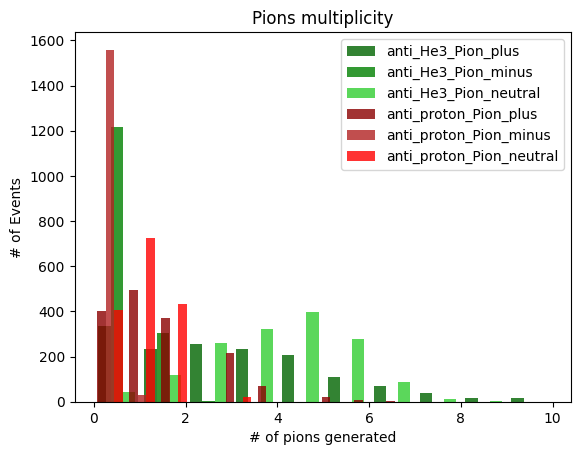

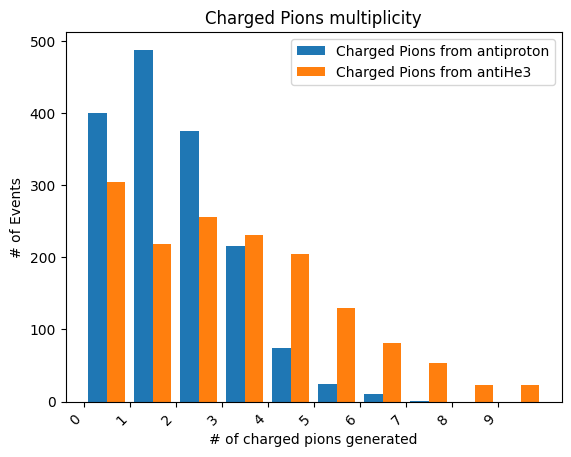

In [9]:
# This is for listing pi-/pi+/pi0 multiplicity
plt.figure(1)

anti_proton_Pion_plus = []
anti_proton_Pion_minus = []
anti_proton_Pion_neutral = []
anti_proton_Pion_Charged = []

for i in range(anti_proton_Result.get_number_of_events()):
    anti_proton_Pion_plus.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 2112))
    anti_proton_Pion_minus.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == -2112))
    anti_proton_Pion_neutral.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 211))
    
anti_proton_Pion_profile = [anti_proton_Pion_plus, anti_proton_Pion_minus, anti_proton_Pion_neutral]
anti_proton_Pion_label = ['anti_proton_Pion_plus', 'anti_proton_Pion_minus', 'anti_proton_Pion_neutral']
anti_proton_Pion_color = ['darkred', 'firebrick', 'red']

# Count the occurrences of each value
unique_values_pi_plus, value_counts_pi_plus = np.unique(anti_proton_Pion_plus, return_counts=True)
unique_values_pi_minus, value_counts_pi_minus = np.unique(anti_proton_Pion_minus, return_counts=True)
unique_values_pi_neutral, value_counts_pi_neutral = np.unique(anti_proton_Pion_neutral, return_counts=True)
"""
# Create the bar plot
plt.bar(unique_values_pi_plus, value_counts_pi_plus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_minus, value_counts_pi_minus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_neutral, value_counts_pi_neutral, alpha=0.6, label='# of Pi0 generated')
"""

plt.hist(anti_He3_Pion_profile, label = anti_He3_Pion_label, color=anti_He3_Pion_color, alpha=0.8)
plt.hist(anti_proton_Pion_profile, label = anti_proton_Pion_label, color=anti_proton_Pion_color, alpha=0.8)


# Add labels and title
plt.xlabel('# of pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('# of Events')
plt.legend()
plt.title('Pions multiplicity')

plt.figure(2)

anti_proton_Pion_Charged = np.add(anti_proton_Pion_plus, anti_proton_Pion_minus)
anti_He3_Pion_Charged = np.add(anti_He3_Pion_plus, anti_He3_Pion_minus)
#anti_He3_Pion_Charged.extend(anti_He3_Pion_minus)
Pion_Charged = [anti_proton_Pion_Charged, anti_He3_Pion_Charged]
Pion_Charged_label = ['Charged Pions from antiproton', 'Charged Pions from antiHe3']
plt.hist(Pion_Charged, label = Pion_Charged_label)
# Add labels and title
plt.xlabel('# of charged pions generated')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rotation=45, ha='right')
plt.ylabel('# of Events')
plt.legend()
plt.title('Charged Pions multiplicity')

# Show the plot
plt.show()

ValueError: It looks like the parameter(s) in column(s) 1 have no dynamic range. Please provide a `range` argument.

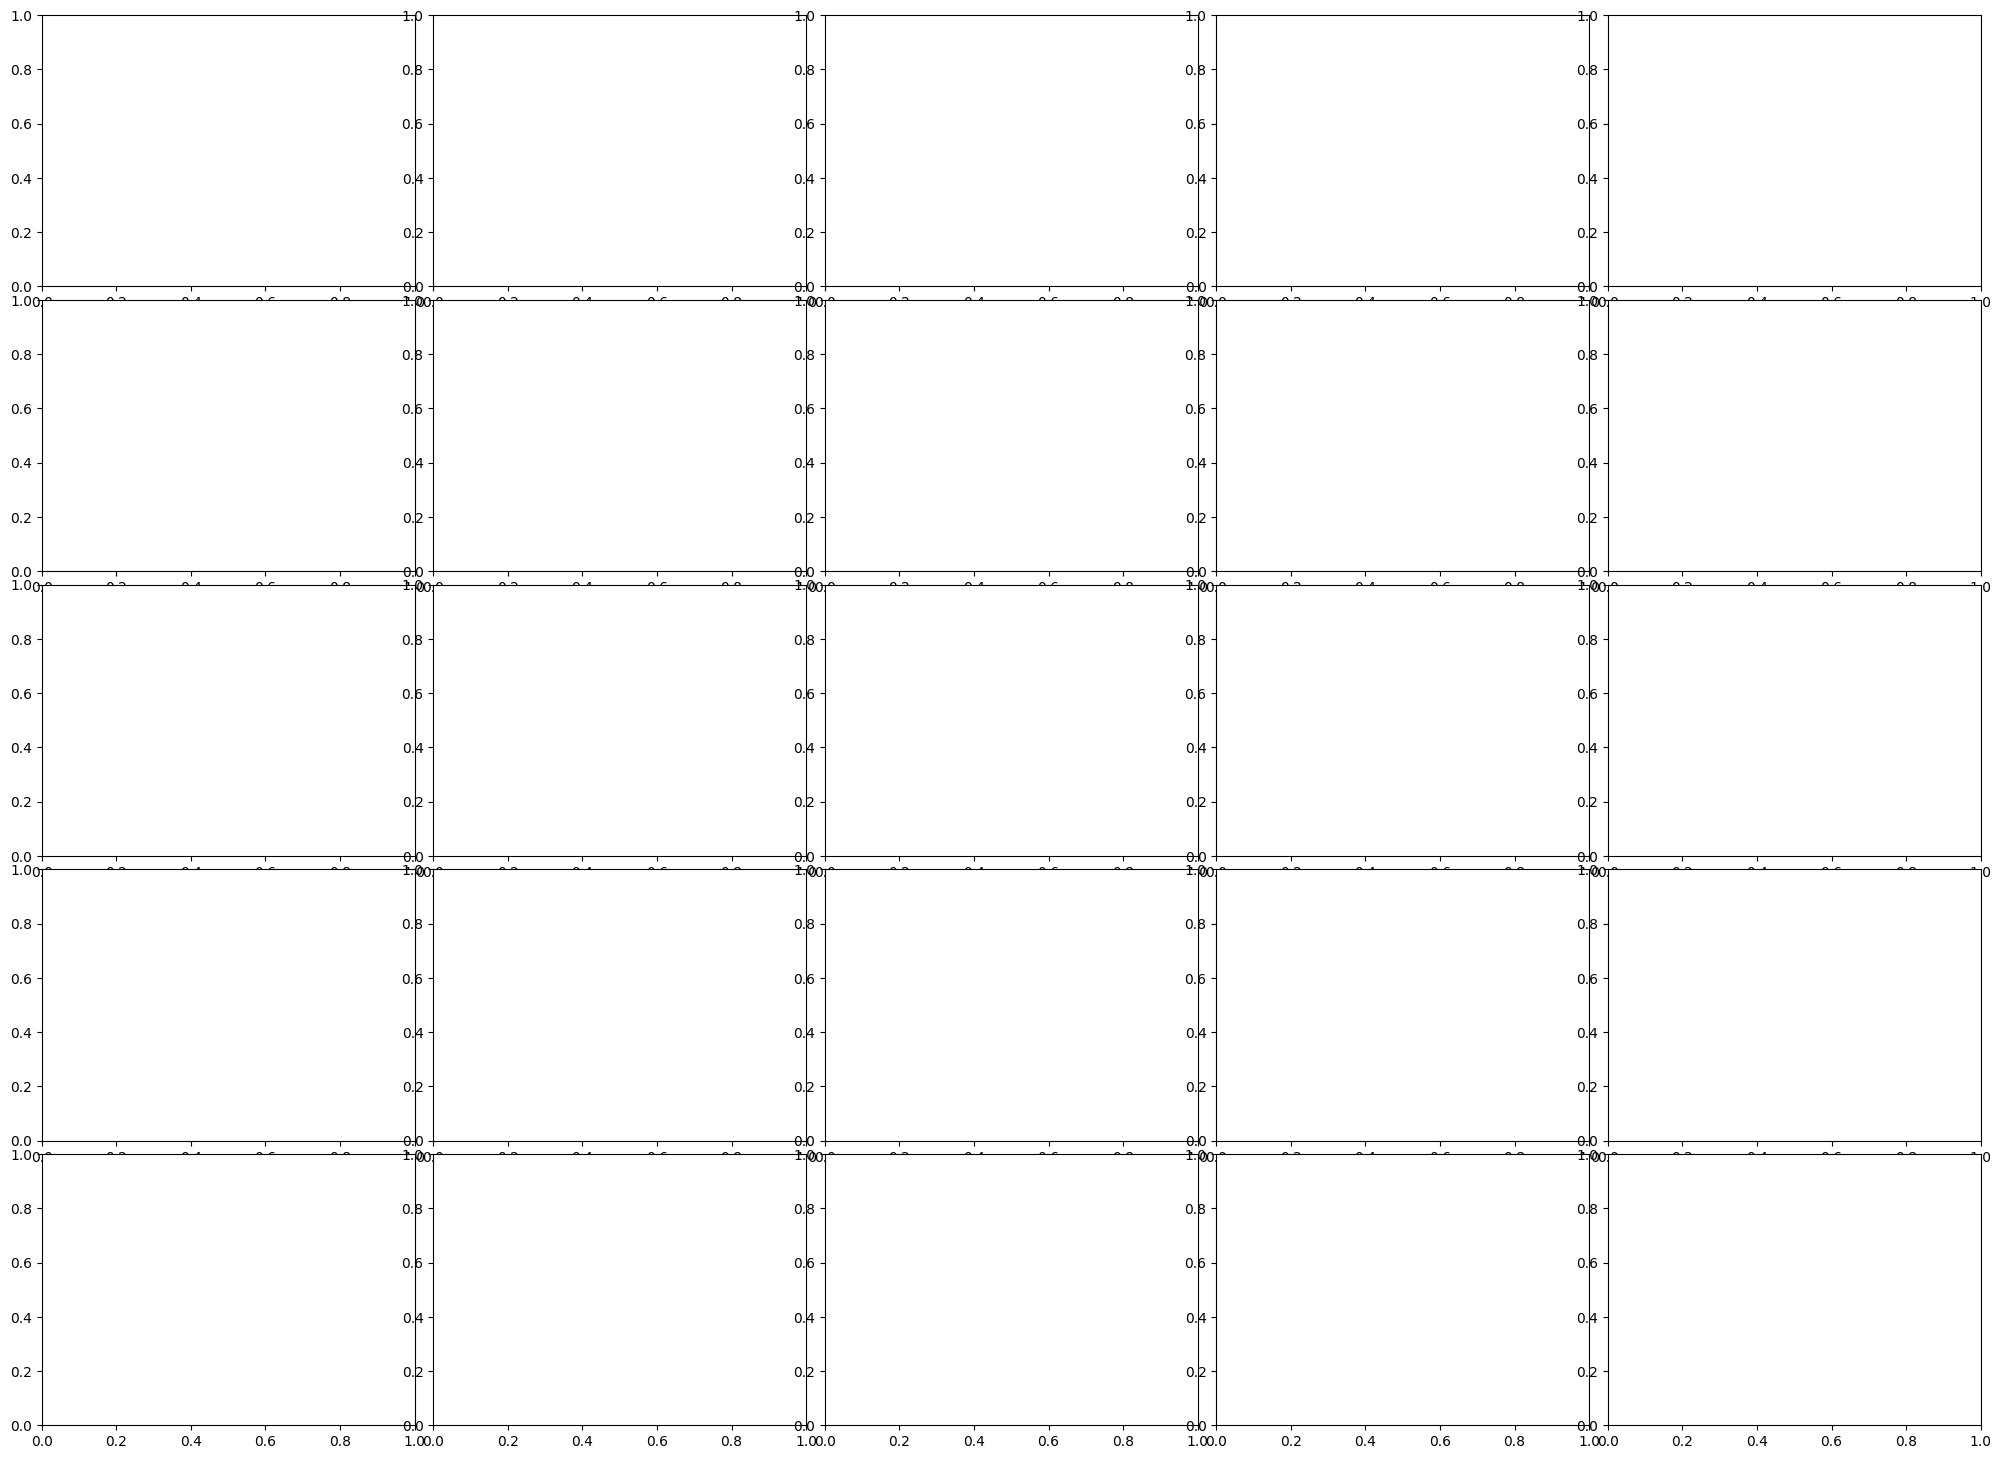

In [10]:
# This code output corner plot of daughters

# This is for antihelium3 corner plot
anti_He3_corner_Charged_pion = []
anti_He3_corner_proton = []
anti_He3_corner_distance_traveled = []
anti_He3_corner_TOF_out_energy = []
anti_He3_corner_TOF_in_energy = []
anti_He3_corner_TOF_time = []
anti_He3_corner_label = ['# of Charged Pions', 'Travel Distance/cm', 'E_Outer_TOF/MeV', 'E_Inner_TOF/MeV', 'Time_TOF/ns']

for i in range(anti_He3_Result.get_number_of_events()):
    anti_He3_corner_Charged_pion.append(np.count_nonzero(np.logical_or(np.array(anti_He3_Result.get_value(i, 1)[1]) == 2112,np.array(anti_He3_Result.get_value(i, 1)[1]) == -2112)))
    anti_He3_corner_proton.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 2212))
    anti_He3_corner_distance_traveled.append(anti_He3_Result.get_value(i, 0)[3])
    anti_He3_corner_TOF_out_energy.append(anti_He3_Result.get_value(i, 0)[4])
    anti_He3_corner_TOF_in_energy.append(anti_He3_Result.get_value(i, 0)[5])
    anti_He3_corner_TOF_time.append(anti_He3_Result.get_value(i, 0)[6])


# This is for antiproton corner plot
anti_proton_corner_Charged_pion = []
anti_proton_corner_proton = []
anti_proton_corner_distance_traveled = []
anti_proton_corner_TOF_out_energy = []
anti_proton_corner_TOF_in_energy = []
anti_proton_corner_TOF_time = []
anti_proton_corner_label = ['# of Charged Pions', 'Travel Distance/cm', 'E_Outer_TOF/MeV', 'E_Inner_TOF/MeV', 'Time_TOF/ns']

for i in range(anti_proton_Result.get_number_of_events()):
    anti_proton_corner_Charged_pion.append(np.count_nonzero(np.logical_or(np.array(anti_proton_Result.get_value(i, 1)[1]) == 2112,np.array(anti_proton_Result.get_value(i, 1)[1]) == -2112)))
    anti_proton_corner_proton.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 2212))
    anti_proton_corner_distance_traveled.append(anti_proton_Result.get_value(i, 0)[3])
    anti_proton_corner_TOF_out_energy.append(anti_proton_Result.get_value(i, 0)[4])
    anti_proton_corner_TOF_in_energy.append(anti_proton_Result.get_value(i, 0)[5])
    anti_proton_corner_TOF_time.append(anti_proton_Result.get_value(i, 0)[6])
    

# Mean and standard deviation
#model A
anti_proton_mu = 2.65 + 3.65 * np.log(2)
anti_deuteron_mu = 2.65 + 3.65 * np.log(4)
anti_He3_mu = 2.65 + 3.65 * np.log(6)

anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(anti_deuteron_mu * 0.174 * math.pow(4, 0.4))
anti_He3_sigma = np.sqrt(anti_He3_mu * 0.174 * math.pow(6, 0.4))
"""
#model B
anti_proton_mu = 2.65 + 3.65 * np.log(2)
anti_deuteron_mu = 2 * anti_proton_mu
anti_He3_mu = 3 * anti_proton_mu
anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(2) * anti_proton_sigma
anti_He3_sigma = np.sqrt(3) * anti_proton_sigma
"""

# Generate random numbers from the Gaussian distribution
anti_proton_corner_Charged_pion_model = np.random.normal(anti_proton_mu, anti_proton_sigma, size=len(anti_proton_corner_Charged_pion))
anti_He3_corner_Charged_pion_model = np.random.normal(anti_He3_mu, anti_He3_sigma, size=len(anti_He3_corner_Charged_pion))


anti_proton_Corner_data = pd.DataFrame(anti_proton_corner_Charged_pion_model, columns=['Charged Pions'])
#anti_proton_Corner_data['# of protons'] = anti_proton_corner_proton
anti_proton_Corner_data['distance traveled inside LAr'] = anti_proton_corner_distance_traveled
anti_proton_Corner_data['Energy deposit in the Outer TOF'] = anti_proton_corner_TOF_out_energy
anti_proton_Corner_data['Energy deposit in the inner TOF'] = anti_proton_corner_TOF_in_energy
anti_proton_Corner_data['time differece in between TOFs'] = anti_proton_corner_TOF_time

anti_He3_Corner_data = pd.DataFrame(anti_He3_corner_Charged_pion_model, columns=['Charged Pions'])
#anti_He3_Corner_data['# of protons'] = anti_He3_corner_proton
anti_He3_Corner_data['distance traveled inside LAr'] = anti_He3_corner_distance_traveled
anti_He3_Corner_data['Energy deposit in the Outer TOF'] = anti_He3_corner_TOF_out_energy
anti_He3_Corner_data['Energy deposit in the inner TOF'] = anti_He3_corner_TOF_in_energy
anti_He3_Corner_data['time differece in between TOFs'] = anti_He3_corner_TOF_time    

"""
figure1 = corner.corner(anti_proton_Corner_data, color='r')
figure1 = corner.corner(anti_He3_Corner_data, color='b', labels = anti_He3_corner_label, show_titles=True, fig = figure1)

# Add a separate legend to the corner plot
legend_elements = [
    plt.Line2D([0], [0], color='blue', label='AntiHelium3'),
    plt.Line2D([0], [0], color='red', label='Antiproton'),
    # Add more legend elements as needed
]

figure1.subplots_adjust(top=0.9)
figure1.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.33, 0.85), ncol=1)
"""


# Create the first corner plot
figure1 = plt.figure(figsize=(22, 16))
corner.corner(
    anti_proton_Corner_data,
    color='r',
    labels=anti_proton_corner_label,
    show_titles=True,
    fig=figure1
)

# Create the second corner plot
figure2 = plt.figure(figsize=(22, 16))
corner.corner(
    anti_He3_Corner_data,
    color='b',
    labels=anti_He3_corner_label,
    show_titles=True,
    fig=figure1
)

# Add a separate legend to the corner plot
legend_elements = [
    plt.Line2D([0], [0], color='blue', label='AntiHelium3'),
    plt.Line2D([0], [0], color='red', label='Antiproton'),
    # Add more legend elements as needed
]

figure1.subplots_adjust(top=0.9)
figure1.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.33, 0.85), ncol=1)

plt.show()

# Save the plot to a file
figure1.savefig('ICRC_anti_He3_corner_plot.png')



In [ ]:
"""
for i in range(anti_He3_Result.get_number_of_events()):
    #if(anti_He3_Result.get_value(i, 0)[6]<0):
    print('event '+str(anti_He3_Result.get_value(i, 0)[0]) +' has time different '+ str(anti_He3_Result.get_value(i, 0)[6])+', Energy deposit in inner TOF is '+ str(anti_He3_Result.get_value(i, 0)[5]))
#plt.hist(anti_proton_corner_TOF_time)
"""

In [ ]:
import numpy as np

# Sample arrays (replace these with your actual arrays)
array1 = np.array([1, 2])
array2 = np.array([3])
array3 = np.array([4])

# Define the desired length (number of elements) for all arrays
desired_length = 3

# Create new arrays with the desired length and fill missing elements with 0
new_array1 = np.pad(array1, (0, desired_length - len(array1)), mode='constant')
new_array2 = np.pad(array2, (0, desired_length - len(array2)), mode='constant')
new_array3 = np.pad(array3, (0, desired_length - len(array3)), mode='constant')

print(new_array1)
print(new_array2)
print(new_array3)
